## LSTM Experiment
Insert Code wherever represented with "#***************#"

In [54]:
import numpy as np
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.preprocessing import sequence
# from keras_preprocessing.sequence import pad_sequences
from keras.preprocessing.sequence import pad_sequences

# fix random seed for reproducibility
#numpy.random.seed(7)

In [55]:
np.random.seed(7)

In [56]:
top_words = 5000
"""
    Load the IMDB Movie Review dataset and train them into train and split from imdb.load_dataset
    Also mention the num_words parameter as top_words
"""
#********************#
(X_train,y_train),(X_test,y_test)=imdb.load_data(num_words=top_words)

In [57]:
print(X_train[1])
print(type(X_train[1]))
print(len(X_train[1]))
print(y_train[1])
print(type(y_train[1]))

[1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 2, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 2, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 2, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 2, 2, 349, 2637, 148, 605, 2, 2, 15, 123, 125, 68, 2, 2, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 2, 5, 2, 656, 245, 2350, 5, 4, 2, 131, 152, 491, 18, 2, 32, 2, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]
<class 'list'>
189
0
<class 'numpy.int64'>


In [58]:
# truncate and/or pad input sequences
max_review_length = 400
"""
    Apply padding to both X_train and x_test variables with above mentioned max_review_length
"""
X_train = pad_sequences(X_train,maxlen=max_review_length)#********************#
X_test =pad_sequences(X_test,maxlen=max_review_length)#********************#

print(X_train.shape)
print(X_train[1])

(25000, 400)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    

In [59]:
import tensorflow as tf
# Create the model

embedding_vector_length = 32

"""
    Create LSTM Model using following Layers:
    1. Embedding Layer
    2. LSTM with 10 neurons
    3. Dense Layer with sigmoid activation for Output
"""
model = Sequential()
model.add(Embedding(top_words+1,embedding_vector_length,input_length=max_review_length))
model.add(LSTM(10))
model.add(Dense(1,activation='sigmoid'))


/Users/admin/Workspace/CoreML/env/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [60]:
"""
    Compile the model using following criteria:
    compile(loss, optimizer, metrics=['accuracy'])
"""
#********************#

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
hist=model.fit(X_train, y_train, epochs=10, batch_size=256,verbose=1, validation_data=(X_test,y_test))

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)

"""
    Print Accuracy acheived by model using the above created scores variable
"""

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.6017 - loss: 0.6763 - val_accuracy: 0.7692 - val_loss: 0.5141
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.8260 - loss: 0.4385 - val_accuracy: 0.8454 - val_loss: 0.3934
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.8489 - loss: 0.3749 - val_accuracy: 0.8462 - val_loss: 0.3709
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.8760 - loss: 0.3268 - val_accuracy: 0.8581 - val_loss: 0.3553
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.8917 - loss: 0.2888 - val_accuracy: 0.8538 - val_loss: 0.3627
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.8289 - loss: 0.4613 - val_accuracy: 0.8502 - val_loss: 0.3652
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.8974 - loss: 0.2771 - val_accuracy: 0.8555 - val_loss: 0.3565
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.9089 - loss: 0.2508 - val_accuracy: 0.8510 - v

[0.3503142297267914, 0.8619599938392639]

In [65]:
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 86.20%


/var/folders/nx/qjk1687x5lq067mvl83vlw_c0000gn/T/ipykernel_94271/3162325051.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


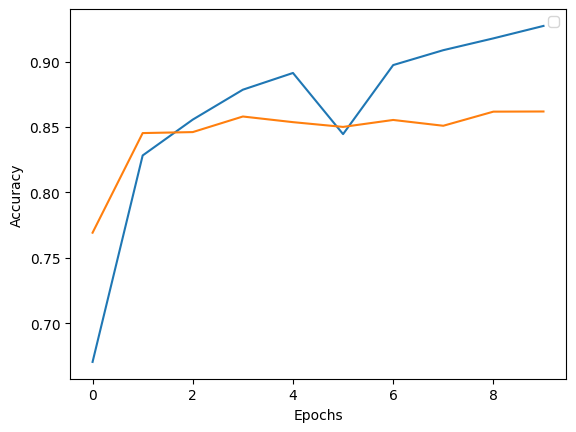

In [ ]:
import matplotlib.pyplot as plt
"""
    Plot graph between epoch vs Accuracy
"""
#********************#
y1=hist.history['accuracy']
y2=hist.history['val_accuracy']
plt.plot(y1)
plt.plot(y2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

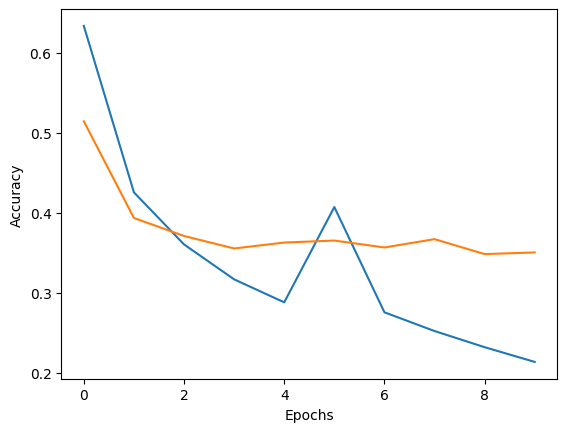

In [70]:
import matplotlib.pyplot as plt
"""
    Plot graph between epoch vs loss
"""
#********************#
l1=hist.history['loss']
l2=hist.history['val_loss']
plt.plot(l1)
plt.plot(l2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [71]:
pred=model.predict(X_test)
print(pred)

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step
[[0.10448202]
 [0.96629286]
 [0.6905938 ]
 ...
 [0.08560421]
 [0.15907674]
 [0.8556438 ]]
